In [2]:
import pandas as pd
df = pd.read_excel('../demo_dataset_new.xlsx')


In [3]:
df.head()

,Title,Author Name,Date,Abstract,Paper Citation Count,Venue,Fields Of Study,Counts,rank
0,wav2vec 2.0: A Framework for Self-Supervised L...,"Alexei Baevski, Henry Zhou, Abdel-rahman Moham...",2020-06-20,We show for the first time that learning power...,1633,Neural Information Processing Systems,"['Computer Science', 'Engineering']",8,170
1,Conformer: Convolution-augmented Transformer f...,"Anmol Gulati, James Qin, C. Chiu, Niki Parmar,...",2020-05-16,Recently Transformer and Convolution neural ne...,1099,Interspeech,"['Computer Science', 'Engineering']",19,135
2,HiFi-GAN: Generative Adversarial Networks for ...,"Jungil Kong, Jaehyeon Kim, Jaekyoung Bae,",2020-10-12,Several recent work on speech synthesis have e...,505,Neural Information Processing Systems,"['Computer Science', 'Engineering']",27,284
3,FastSpeech 2: Fast and High-Quality End-to-End...,"Yi Ren, Chenxu Hu, Xu Tan, Tao Qin, Sheng Zhao...",2020-06-08,Advanced text to speech (TTS) models such as F...,514,International Conference on Learning Represent...,"['Computer Science', 'Engineering']",20,158
4,The airborne lifetime of small speech droplets...,"V. Stadnytskyi, C. Bax, A. Bax, P. Anfinrud,",2020-05-13,Speech droplets generated by asymptomatic carr...,790,Proceedings of the National Academy of Sciences,"['Medicine', 'Materials Science']",26,132


In [6]:
author_list = df['Author Name'].tolist()

In [10]:
# utf-8 encoding
author_list = [str(i) for i in author_list]
# not ensure_ascii
author_list = [i.encode('utf-8').decode('utf-8') for i in author_list]

In [12]:
# Define a function to extract the author names from each entry
def extract_authors(entry):
    # Remove the trailing comma from the entry
    entry = entry.rstrip(',')
    # Split the entry into a list of individual author names
    author_list = entry.split(', ')
    # Remove any leading or trailing whitespace from the author names
    author_list = [author.strip() for author in author_list]
    # Return the list of author names
    return author_list

# Apply the function to each entry in the authors list
all_authors = []
for entry in author_list:
    all_authors.extend(extract_authors(entry))
# Remove any duplicates from the list of authors
all_authors = list(set(all_authors))

In [13]:
len(all_authors)

43442

In [15]:
from dash import dcc

dcc.RangeSlider(0, 3, value=[0, 3])

RangeSlider(min=0, max=3, value=[0, 3])

In [17]:
author_list

['Alexei Baevski, Henry Zhou, Abdel-rahman Mohamed, Michael Auli,',
 'Anmol Gulati, James Qin, C. Chiu, Niki Parmar, Yu Zhang, Jiahui Yu, Wei Han, Shibo Wang, Zhengdong Zhang, Yonghui Wu, Ruoming Pang,',
 'Jungil Kong, Jaehyeon Kim, Jaekyoung Bae,',
 'Yi Ren, Chenxu Hu, Xu Tan, Tao Qin, Sheng Zhao, Zhou Zhao, Tie-Yan Liu,',
 'V. Stadnytskyi, C. Bax, A. Bax, P. Anfinrud,',
 'Alexis Conneau, Alexei Baevski, Ronan Collobert, Abdel-rahman Mohamed, Michael Auli,',
 'Yanxin Hu, Yun Liu, Shubo Lv, Mengtao Xing, Shimin Zhang, Yihui Fu, Jian Wu, Bihong Zhang, Lei Xie,',
 'Douwe Kiela, Hamed Firooz, Aravind Mohan, Vedanuj Goswami, Amanpreet Singh, Pratik Ringshia, Davide Testuggine,',
 'Qian Zhang, Han Lu, H. Sak, Anshuman Tripathi, E. McDermott, Stephen Koo, Shankar Kumar,',
 'Prajwal K R, Rudrabha Mukhopadhyay, Vinay P. Namboodiri, C. V. Jawahar,',
 'Jaehyeon Kim, Sungwon Kim, Jungil Kong, Sungroh Yoon,',
 'Vineel Pratap, Qiantong Xu, Anuroop Sriram, Gabriel Synnaeve, Ronan Collobert,',
 'Alli

/Users/yueqianlin/opt/anaconda3/envs/fp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30473 (\N{CJK UNIFIED IDEOGRAPH-7709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yueqianlin/opt/anaconda3/envs/fp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21589 (\N{CJK UNIFIED IDEOGRAPH-5455}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yueqianlin/opt/anaconda3/envs/fp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33206 (\N{CJK UNIFIED IDEOGRAPH-81B6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yueqianlin/opt/anaconda3/envs/fp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23186 (\N{CJK UNIFIED IDEOGRAPH-5A92}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


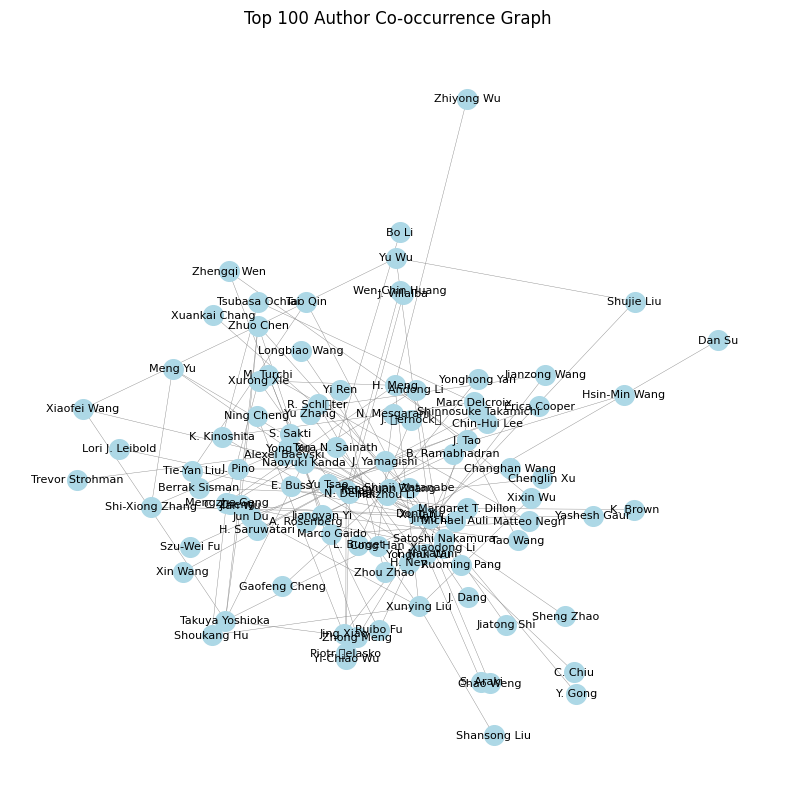

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_excel('../demo_dataset_new.xlsx')
author_list = df['Author Name'].tolist()

# Define a function to extract the author names from each entry
def extract_authors(entry):
    entry = entry.rstrip(',')
    author_list = entry.split(', ')
    author_list = [author.strip() for author in author_list]
    return author_list

# Create an empty graph
G = nx.Graph()

# Iterate over each entry in the author_list
for entry in author_list:
    authors = extract_authors(entry)
    
    # Add edges between all pairs of authors in the entry
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            author1 = authors[i]
            author2 = authors[j]
            # Increment the weight of the edge if it already exists
            if G.has_edge(author1, author2):
                G[author1][author2]['weight'] += 1
            else:
                G.add_edge(author1, author2, weight=1)

# Create a sorted list of edges based on their weight in descending order
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Keep only the top 100 edges
top_edges = sorted_edges[:100]

# Create a new graph with only the top edges
G_top = nx.Graph()
G_top.add_edges_from(top_edges)

# Generate the layout of the graph
pos = nx.kamada_kawai_layout(G_top)

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(G_top, pos, edge_color='#888', width=0.3)
nx.draw_networkx_nodes(G_top, pos, node_color='lightblue', node_size=200)
nx.draw_networkx_labels(G_top, pos, font_size=8, font_color='black', font_family='sans-serif')
plt.title('Top 100 Author Co-occurrence Graph')
plt.axis('off')
plt.show()


In [33]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

df = pd.read_excel('../demo_dataset_new.xlsx')
author_list = df['Author Name'].tolist()

# Define a function to extract the author names from each entry
def extract_authors(entry):
    entry = entry.rstrip(',')
    author_list = entry.split(', ')
    author_list = [author.strip() for author in author_list]
    return author_list

# Create an empty graph
G = nx.Graph()

# Iterate over each entry in the author_list
for entry in author_list:
    authors = extract_authors(entry)
    
    # Add edges between all pairs of authors in the entry
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            author1 = authors[i]
            author2 = authors[j]
            # Increment the weight of the edge if it already exists
            if G.has_edge(author1, author2):
                G[author1][author2]['weight'] += 1
            else:
                G.add_edge(author1, author2, weight=1)

# Create a sorted list of edges based on their weight in descending order
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=False)

# Keep only the top 1000 edges
top_edges = sorted_edges[:1000]

# Create a new graph with only the top edges
G_top = nx.Graph()
G_top.add_edges_from(top_edges)

# Generate the layout of the graph
pos = nx.kamada_kawai_layout(G_top)

# Extract node positions and edge coordinates
node_x = []
node_y = []
for node, position in pos.items():
    node_x.append(position[0])
    node_y.append(position[1])

edge_x = []
edge_y = []
for edge in G_top.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.3, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='lightblue',
        opacity=0.9,
        size=10))

# Create a list of node labels
node_labels = [node for node in G_top.nodes()]

# Create node text
node_text = [f"{node}<br>Co-occurrences: {len(adjacencies)}" for node, adjacencies in G_top.adjacency()]

# Update node trace with labels and text
node_trace.text = node_labels
node_trace.hovertext = node_text

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Top 1000 Author Co-occurrence Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    plot_bgcolor='rgba(0,0,0,0)',
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    ))

# Show the figure
fig.show()


In [37]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Read the Excel file into a DataFrame
df = pd.read_excel('../demo_dataset_new.xlsx')

# Extract the author names from the DataFrame
author_list = df['Author Name'].tolist()

# Define a function to extract the author names from each entry
def extract_authors(entry):
    authors = entry.split(', ')
    authors = [author.strip() for author in authors]
    return authors

# Create an empty graph
G = nx.Graph()

# Iterate over each entry in the author_list
for entry in author_list:
    authors = extract_authors(entry)
    
    # Add edges between all pairs of authors in the entry
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            author1 = authors[i]
            author2 = authors[j]
            
            # Increment the weight of the edge if it already exists
            if G.has_edge(author1, author2):
                G[author1][author2]['weight'] += 1
            else:
                G.add_edge(author1, author2, weight=1)

# Create a sorted list of edges based on their weight in descending order
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Keep only the top 1000 edges
top_edges = sorted_edges[:100]

# Create a new graph with only the top edges
G_top = nx.Graph()
G_top.add_edges_from(top_edges)

# Generate the layout of the graph
pos = nx.kamada_kawai_layout(G_top)

# Extract node positions and edge coordinates
node_x = []
node_y = []
for node, position in pos.items():
    node_x.append(position[0])
    node_y.append(position[1])

edge_x = []
edge_y = []
for edge in G_top.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.3, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='lightblue',
        opacity=0.9,
        size=10))

# Create a list of node labels
node_labels = list(G_top.nodes())

# Create node text
node_text = [f"{node}<br>Co-occurrences: {len(list(G_top.neighbors(node)))}" for node in G_top.nodes()]

# Update node trace with labels and text
node_trace.text = node_labels
node_trace.hovertext = node_text

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Top 1000 Author Co-occurrence Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    plot_bgcolor='rgba(0,0,0,0)',
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                     ))

# Show the figure
fig.show()



In [101]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Read the Excel file into a DataFrame
df = pd.read_excel('../demo_dataset_new.xlsx')

# Extract the author names from the DataFrame
author_list = df['Author Name'].tolist()

# Define a function to extract the author names from each entry
def extract_authors(entry):
    authors = entry.split(', ')
    if len(authors) > 1 and authors[-1].endswith(','):
        # Split the last name and remove the trailing comma
        last_name = authors[-1][:-1]
        authors = authors[:-1] + [last_name]
    authors = [author.strip() for author in authors]
    return authors
# Create an empty graph
G = nx.Graph()

# Iterate over each entry in the author_list
for entry in author_list:
    authors = extract_authors(entry)

    # Add edges between all pairs of authors in the entry
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            author1 = authors[i]
            author2 = authors[j]

            # Increment the weight of the edge if it already exists
            if G.has_edge(author1, author2):
                G[author1][author2]['weight'] += 1
            else:
                G.add_edge(author1, author2, weight=1)
                
# Calculate the co-occurrence counts for each author
co_occurrences = {author: sum(weight['weight'] for weight in G[author].values()) for author in G.nodes()}

# find the authors with the top 100 highest co-occurrence count
least_co_occurrences = sorted(co_occurrences.items(), key=lambda x: x[1], reverse=True)[100][1]
top_authors_nodes = []
for node in G.nodes():
    if co_occurrences[node] > least_co_occurrences:
        top_authors_nodes.append(node)
        
# turn the top_authors into a new graph
G_top = nx.Graph()
for entry in author_list:
    authors = extract_authors(entry)

    # Add edges between all pairs of authors in the entry
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            author1 = authors[i]
            author2 = authors[j]
            if author1 in top_authors_nodes and author2 in top_authors_nodes:
                # Increment the weight of the edge if it already exists
                if G_top.has_edge(author1, author2):
                    G_top[author1][author2]['weight'] += 1
                else:
                    G_top.add_edge(author1, author2, weight=1)
                    

# Generate the layout of the graph
# pos = nx.kamada_kawai_layout(G_top)
# pos = nx.spring_layout(G_top)
# pos = nx.fruchterman_reingold_layout(G_top)
# pos = nx.spectral_layout(G_top)
pos = nx.circular_layout(G_top)


# Extract node positions and edge coordinates
node_x = []
node_y = []
node_size = []
for node, position in pos.items():
    node_x.append(position[0])
    node_y.append(position[1])
    node_size.append(co_occurrences[node])

edge_x = []
edge_y = []
for edge in G_top.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.3, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='lightblue',
        opacity=0.9,
        size=node_size,  # Update the marker size based on co-occurrences
        sizemode='diameter',
        sizeref=max(node_size) / 10,  # Scale the marker size
        sizemin=5
    ))

# Create a list of node labels
node_labels = list(G_top.nodes())

# Create node text
node_text = [f"{node}<br>Co-occurrences: {co_occurrences[node]}" for node in G_top.nodes()]

# Update node trace with labels and text
node_trace.text = node_labels
node_trace.hovertext = node_text

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Top 5 Author Co-occurrence Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    plot_bgcolor='rgba(0,0,0,0)',
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                     ))

# Show the figure
fig.show()
    


In [92]:
len(G_top.edges())

989

In [68]:
for node in G.nodes():
    print(node)
    break

Alexei Baevski


In [58]:
# export nodes and their co-occurrences count from G
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

nodes = G.nodes()
co_occurrences = [len(list(G.neighbors(node))) for node in nodes]

df = pd.DataFrame({'Author Name': nodes, 'Co-occurrences': co_occurrences})
# sort by co-occurrences
df = df.sort_values(by='Co-occurrences', ascending=False)
df.to_excel('co_occurrences.xlsx', index=False)

In [59]:
import pandas as pd
import networkx as nx

# Calculate the co-occurrence counts for each author
co_occurrences = {author: sum(weight['weight'] for weight in G[author].values()) for author in G.nodes()}

# Create a DataFrame with author names and co-occurrence counts
df = pd.DataFrame({'Author Name': co_occurrences.keys(), 'Co-occurrences': co_occurrences.values()})

# Sort the DataFrame by co-occurrence counts in descending order
df = df.sort_values(by='Co-occurrences', ascending=False)

# Export the DataFrame to Excel
df.to_excel('co_occurrences.xlsx', index=False)
